<a href="https://colab.research.google.com/github/saurabh0431481-spec/Loan-Approval-/blob/main/Loanapproval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Task 1: Data Exploration

 Load the dataset into a Python environment (e.g., Jupyter Notebook).
 Display the first few rows of the dataset to understand its structure.
 Check for missing values and handle them if necessary.  
Summarize basic statistics (mean, median,standard deviation, etc.) for the numeric columns.





  



In [ ]:
df = pd.read_csv("/content/loan_sanction_test.csv")

In [ ]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
df.isna().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


 Task 2: Data Visualization

Histograms:Plot the frequency distribution of key numeric variables.

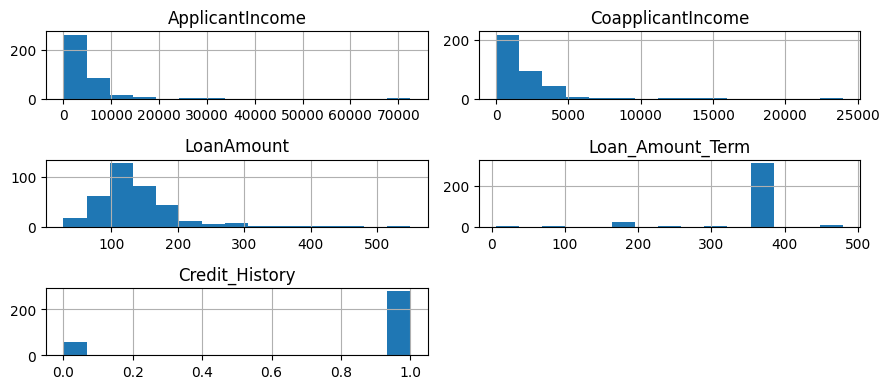

In [ ]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']].hist(figsize=(9,4),bins=15)
plt.tight_layout()
plt.grid(False)
plt.show()


Box Plots: Identify potential outliers and  visualize the spread of data

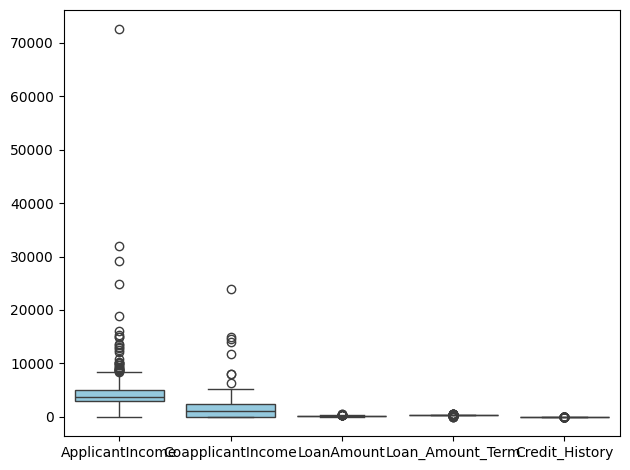

In [ ]:
 sns.boxplot(data=df, color='skyblue')
 #plt.figure(figsize=(12,4))
 plt.tight_layout()
 plt.show()

 Bar Charts: Visualize the frequency distribution of categorical variables.



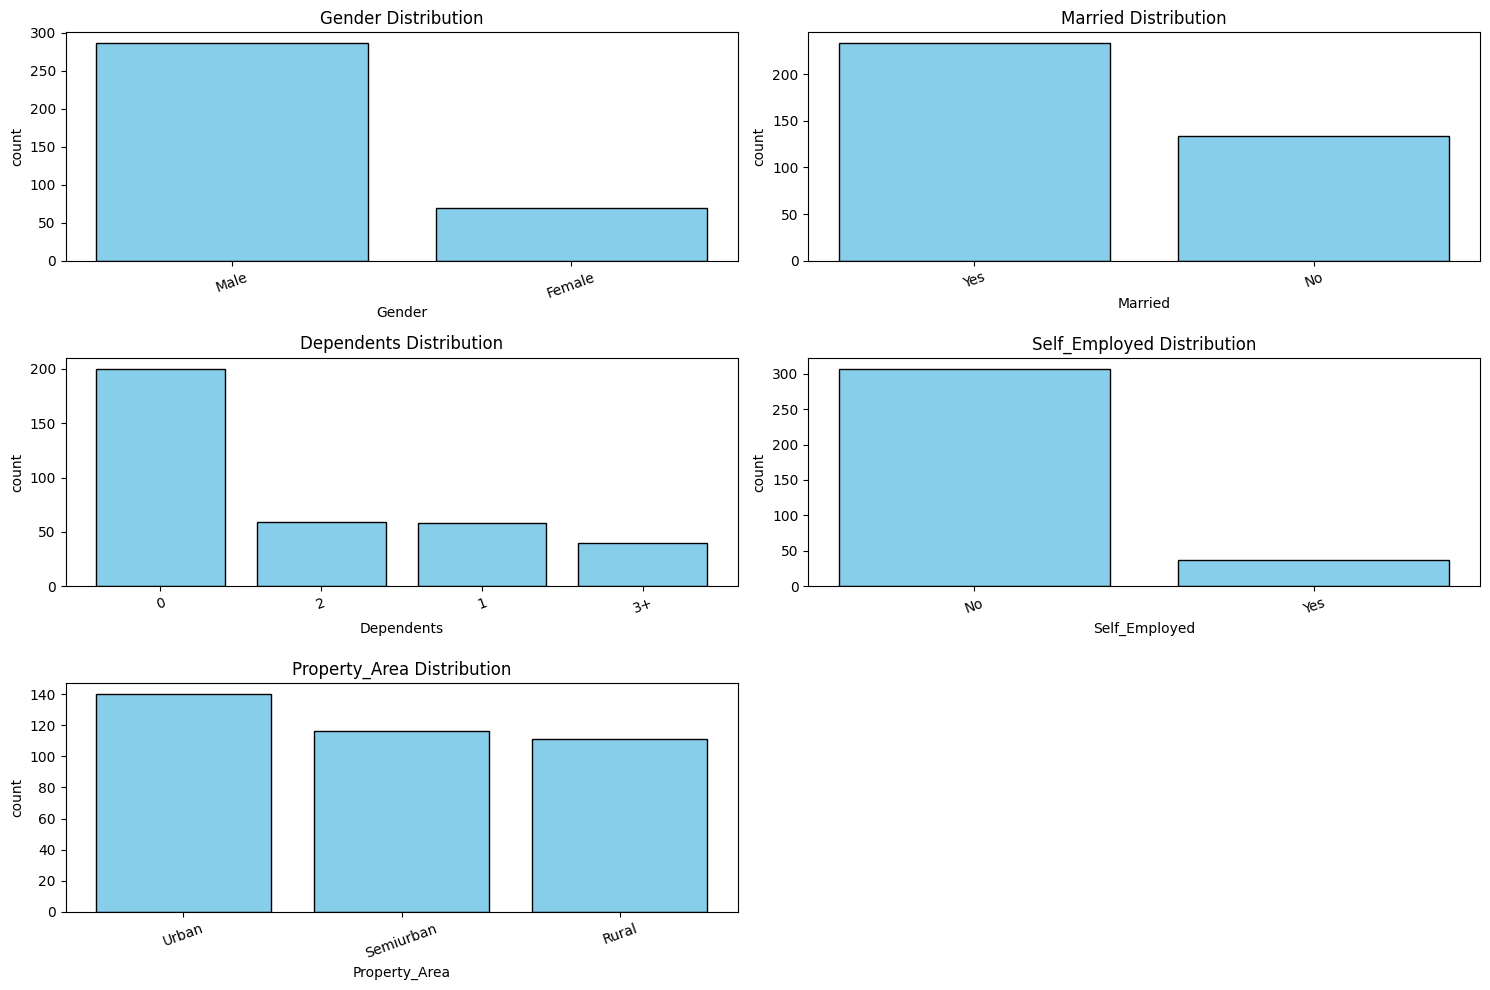

In [ ]:
import matplotlib.pyplot as plt

categorical_cols = ['Gender','Married','Dependents','Self_Employed','Property_Area']

plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_cols, 1):
  plt.subplot(3, 2, i)

  # Get value counts
  value_counts = df[col].value_counts()

  # Plot bar chart
  plt.bar(value_counts.index, value_counts, color='skyblue', edgecolor='black')

  plt.title(f'{col} Distribution')
  plt.xlabel(col)
  plt.ylabel('count')
  plt.xticks(rotation=20)

plt.tight_layout()
plt.show()

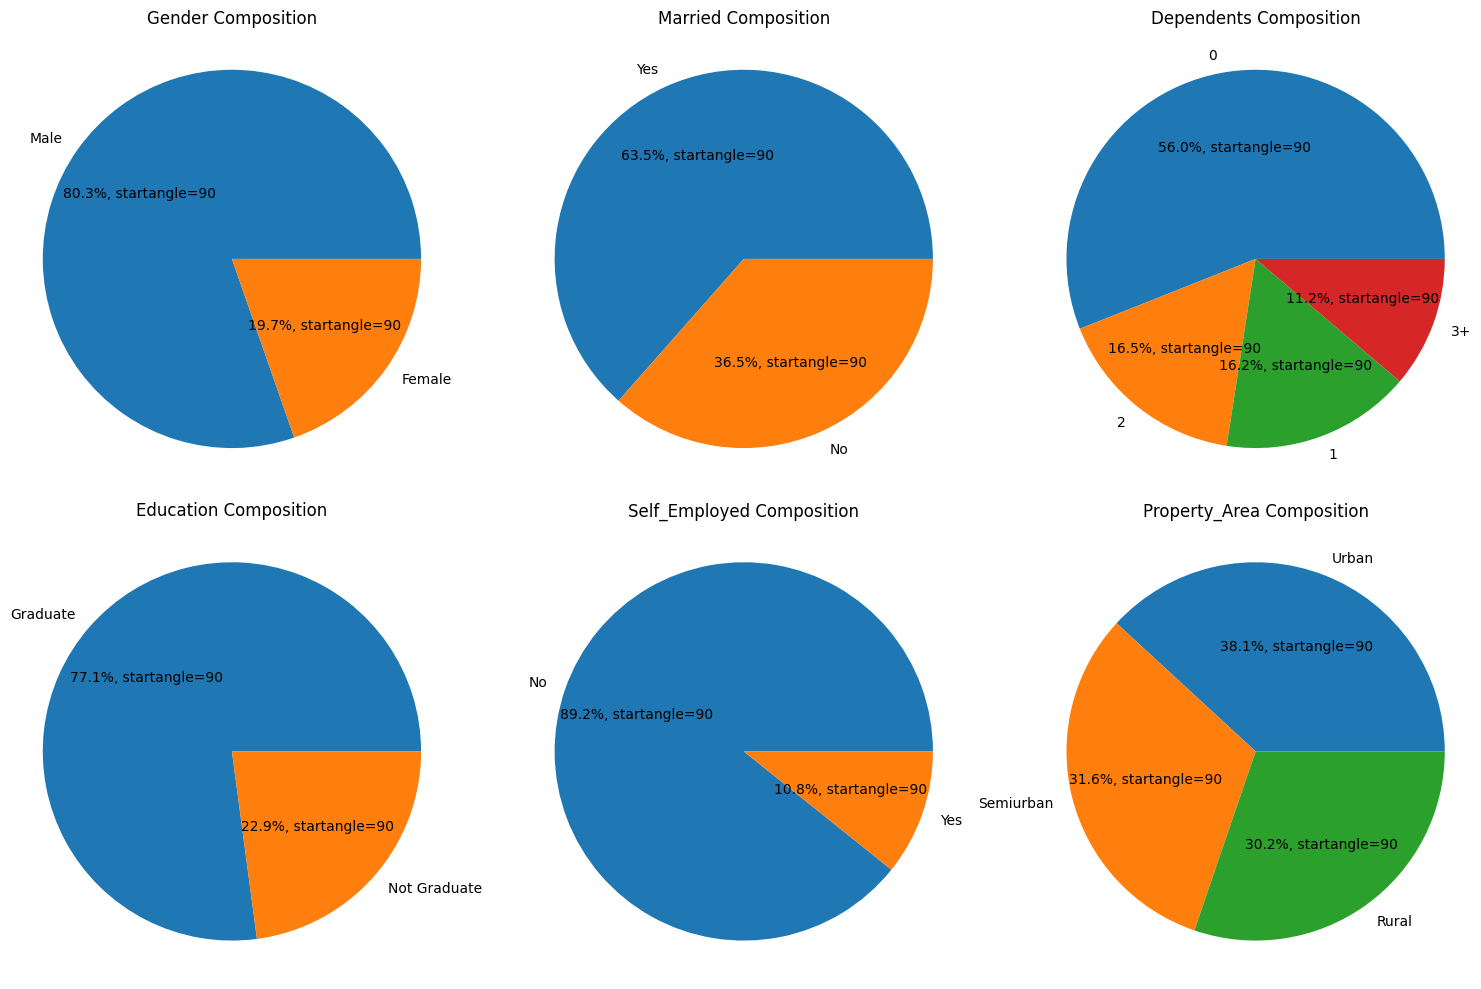

In [ ]:
import matplotlib.pyplot as plt

categorical_cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

# Set up the figure
plt.figure(figsize=(15, 10))

# Create pie chart for each categorical column
for i, col in enumerate(categorical_cols, 1):
  plt.subplot(2, 3, i)
  counts = df[col].value_counts()
  plt.pie(counts, labels=counts.index, autopct='%1.1f%%, startangle=90')
  plt.title(f'{col} Composition')
  plt.axis('equal') # Keeps pie chart circular

plt.tight_layout()
plt.show()

 Create scatter plots to explore relationships between pairs of numeric variables.   



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
a = df[['ApplicantIncome']]
b = df[['CoapplicantIncome']]

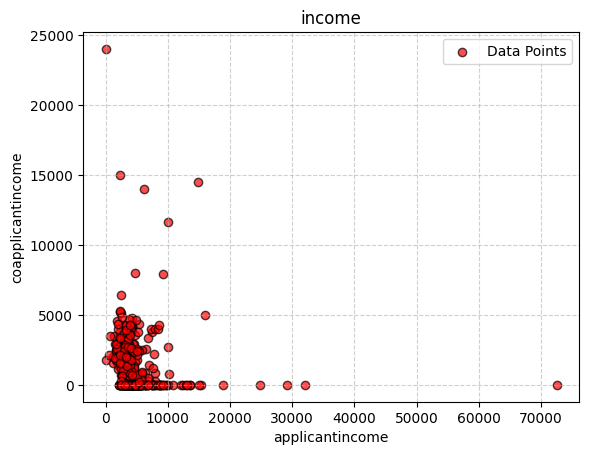

In [ ]:
plt.scatter(a,b, c="red",alpha=0.7, edgecolors='black',label='Data Points')
plt.title('income')
plt.xlabel('applicantincome')
plt.ylabel('coapplicantincome')
plt.grid(True,linestyle='--',alpha=0.6)
plt.legend()
plt.show()

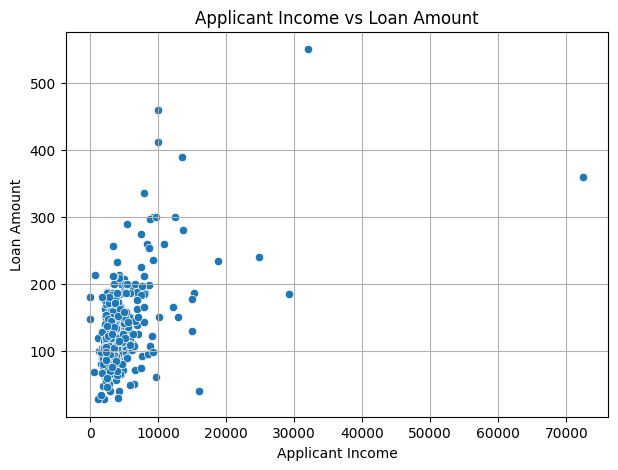

In [ ]:
# ApplicantIncome vs LoanAmount
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='ApplicantIncome', y='LoanAmount')
plt.title('Applicant Income vs Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.grid(True)
plt.show()

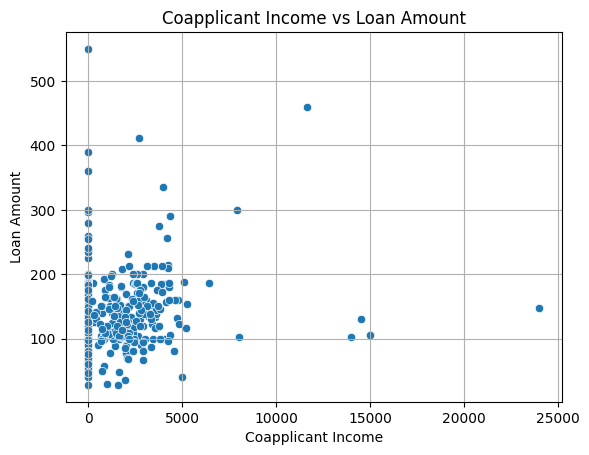

In [ ]:
sns.scatterplot(data=df, x='CoapplicantIncome', y='LoanAmount')
plt.title('Coapplicant Income vs Loan Amount')
plt.xlabel('Coapplicant Income')
plt.ylabel('Loan Amount')
plt.grid(True)
plt.show()

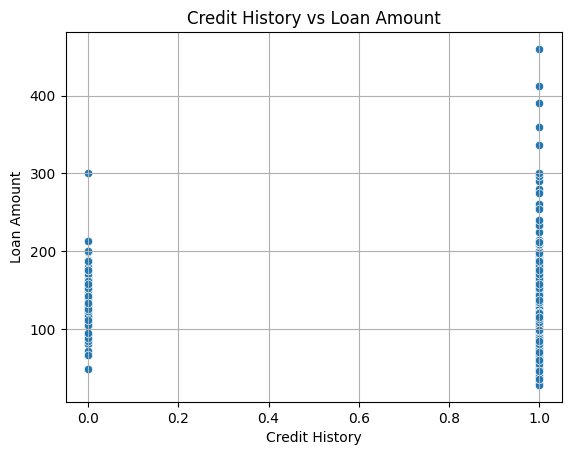

In [ ]:
sns.scatterplot(data=df, x='Credit_History', y='LoanAmount')
plt.title('Credit History vs Loan Amount')
plt.xlabel('Credit History')
plt.ylabel('Loan Amount')
plt.grid(True)
plt.show()

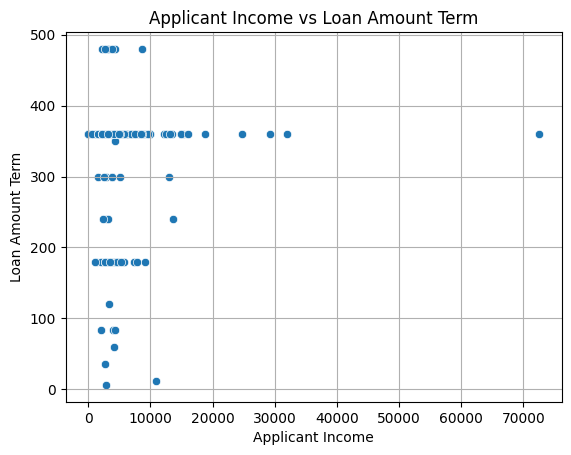

In [ ]:
sns.scatterplot(data=df, x='ApplicantIncome', y='Loan_Amount_Term')
plt.title('Applicant Income vs Loan Amount Term')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount Term')
plt.grid(True)
plt.show()

Use pair plots (scatter matrix) to visualize interactions between multiple numeric variables simultaneously.   




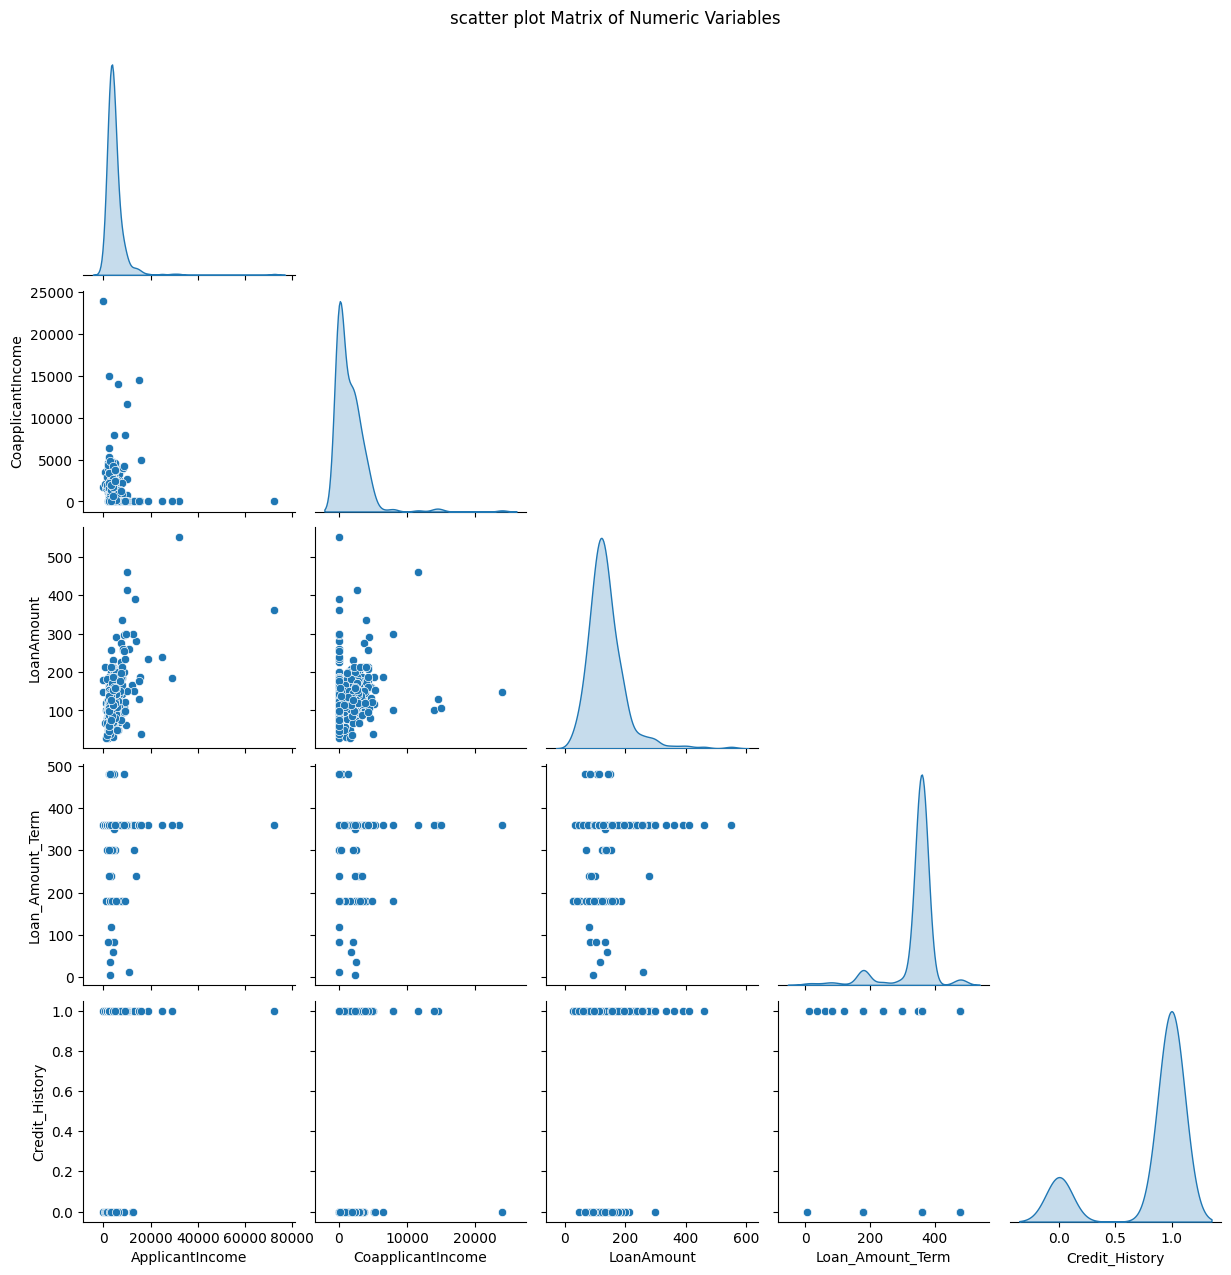

In [ ]:
numeric_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

# Drops rows with missig values in select columns
#df_numeric = df[numeric_cols].dropna()

#Create pairplot
sns.pairplot(df[numeric_cols], diag_kind='kde', corner=True)
plt.suptitle('scatter plot Matrix of Numeric Variables',y=1.02)
plt.show()

Investigate the relationship between categorical and numeric variables using box plots or violin plots

In [ ]:
categorical_variable = df.select_dtypes(include=['object', 'category']).columns
numeric_column = df.select_dtypes(include=['number']).columns


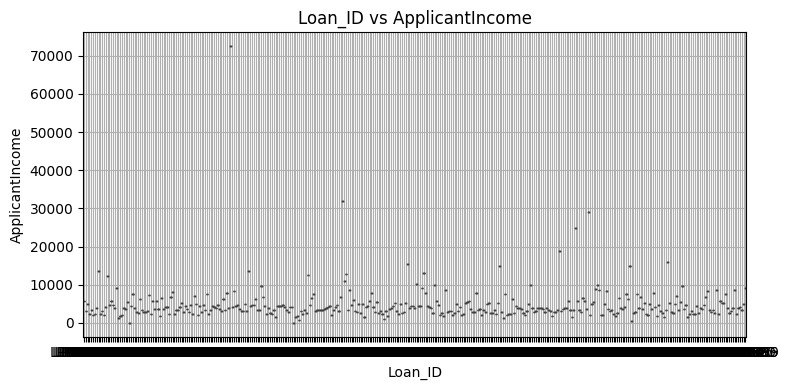

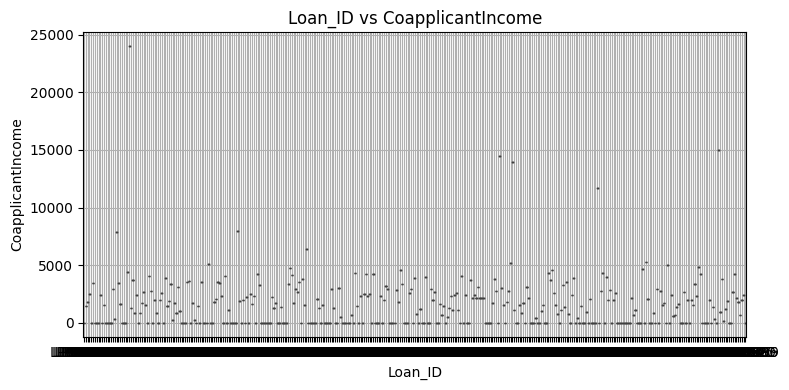

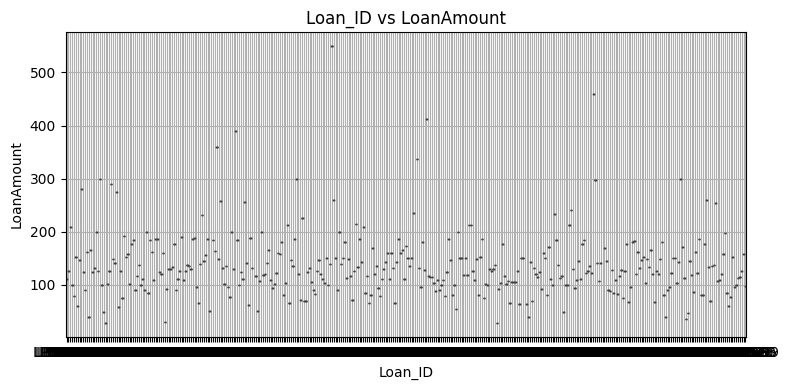

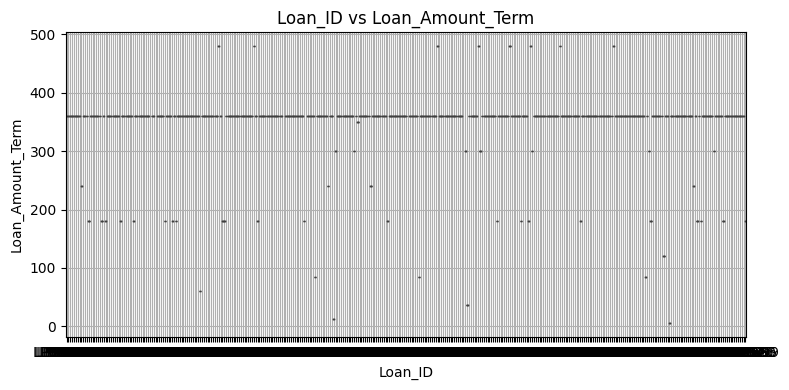

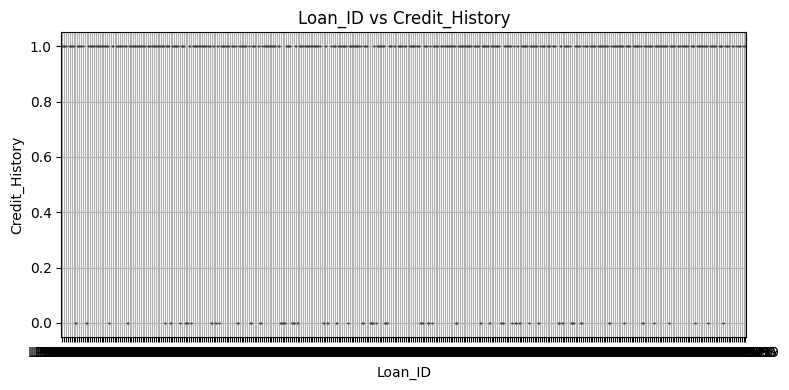

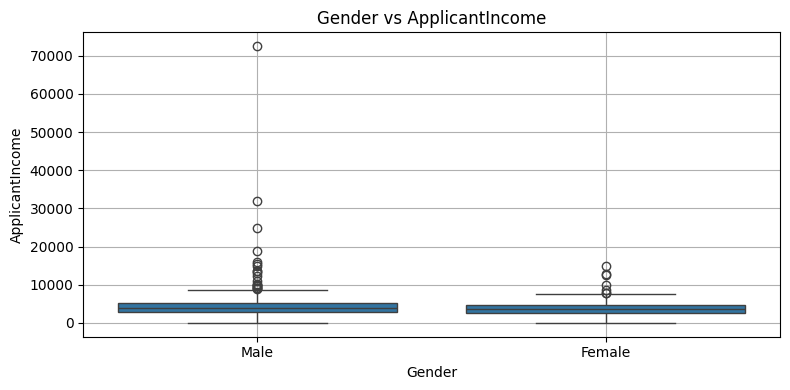

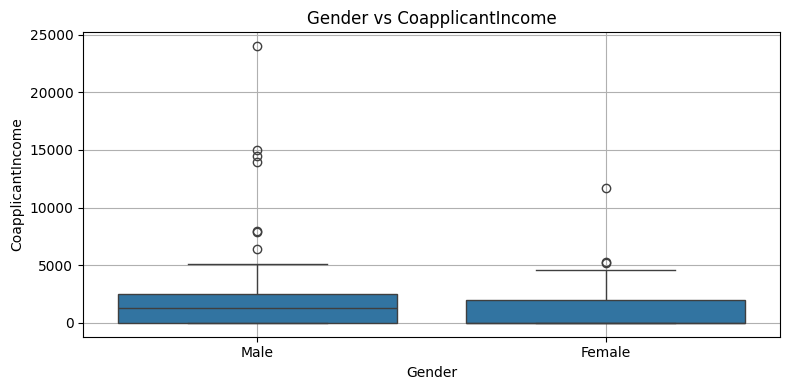

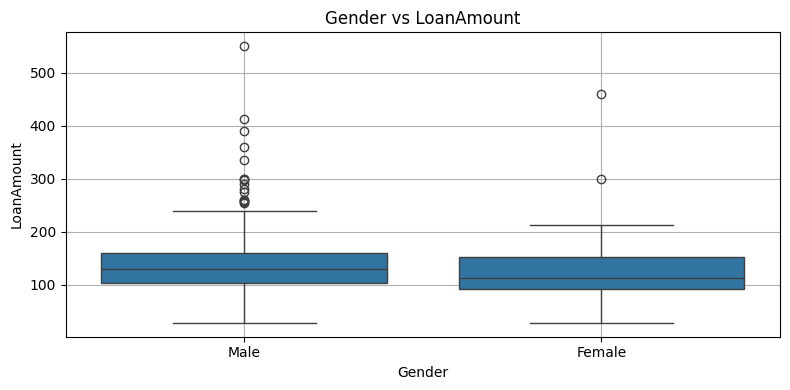

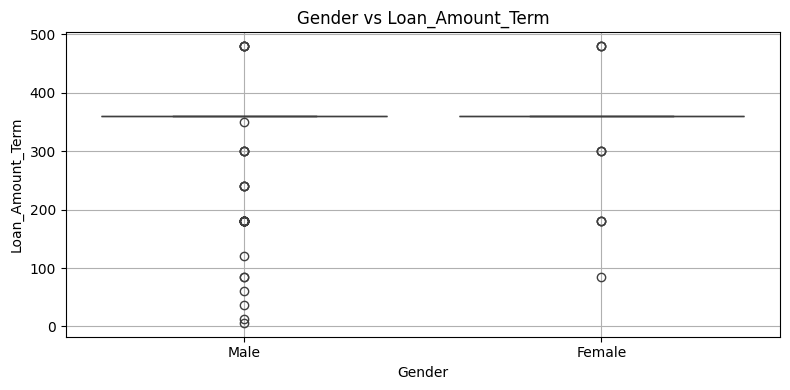

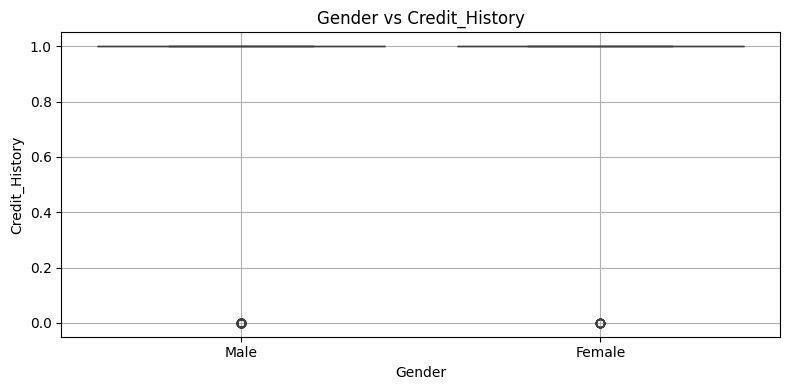

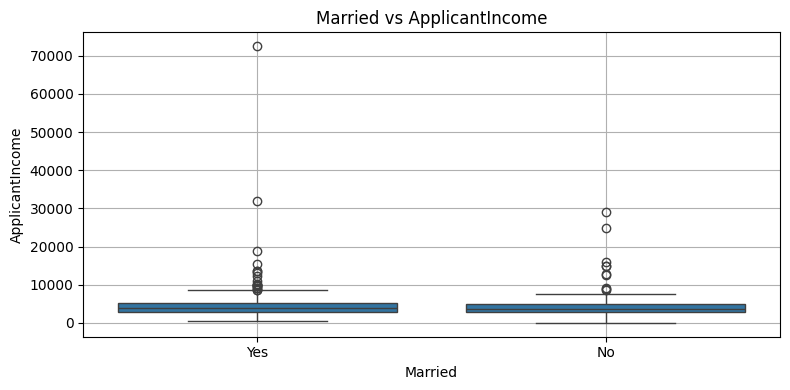

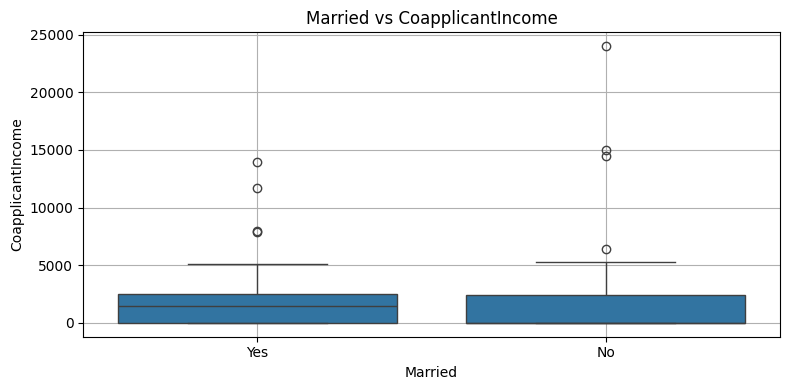

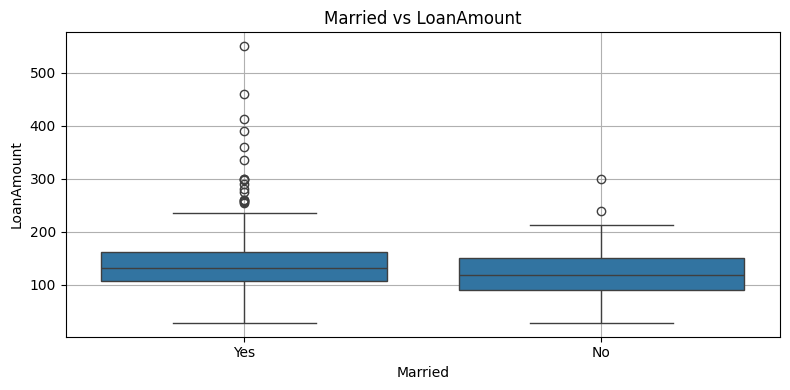

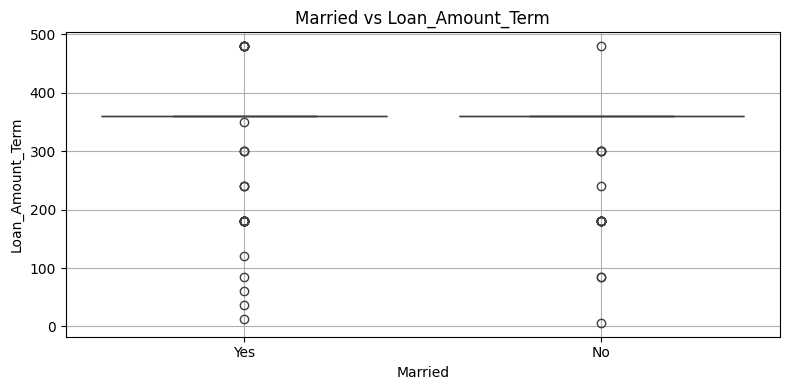

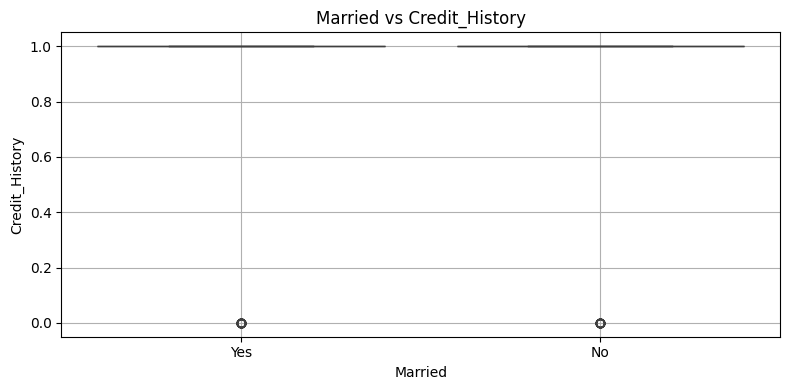

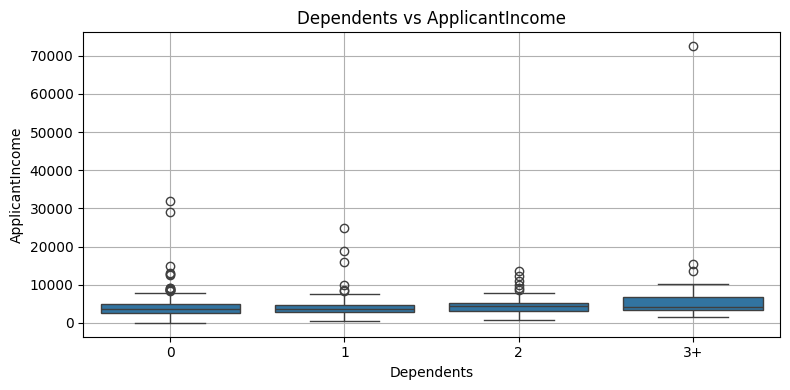

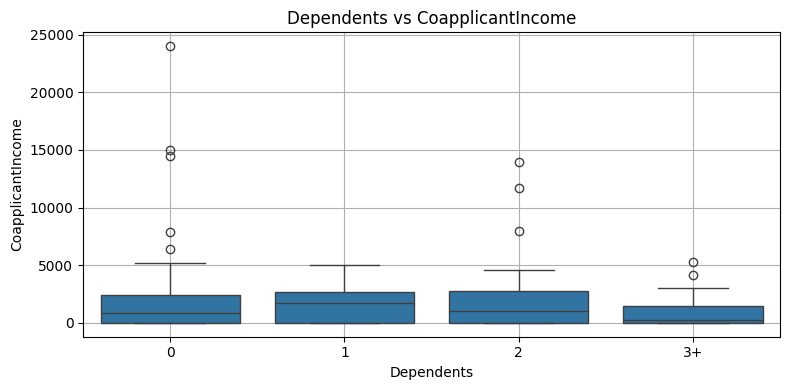

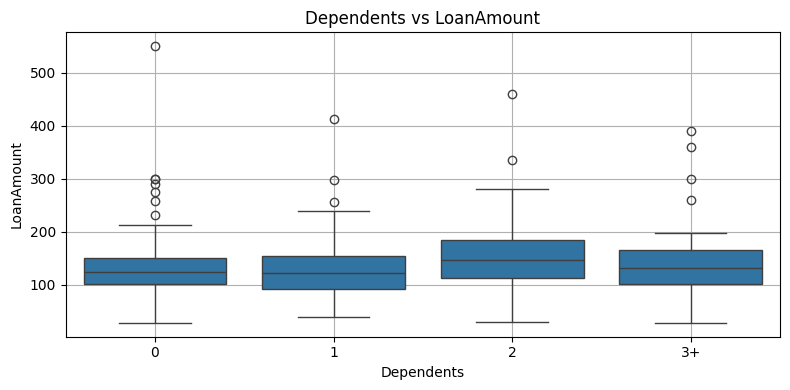

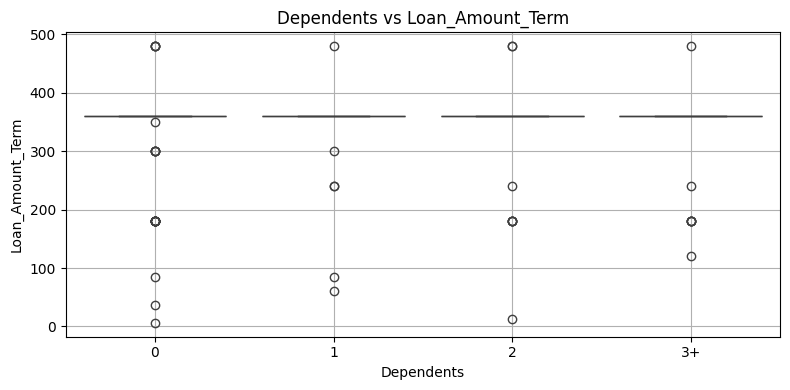

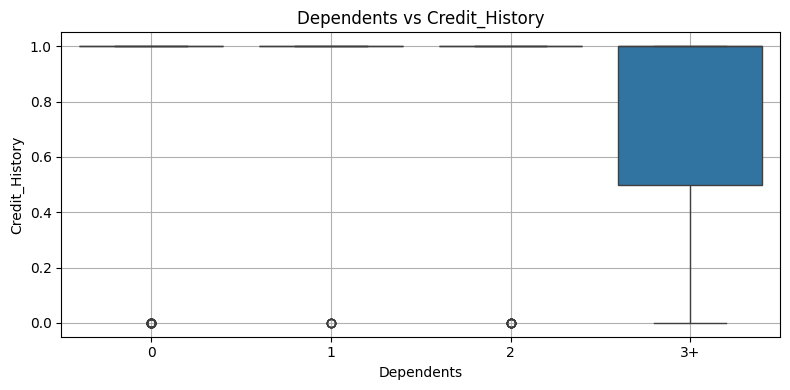

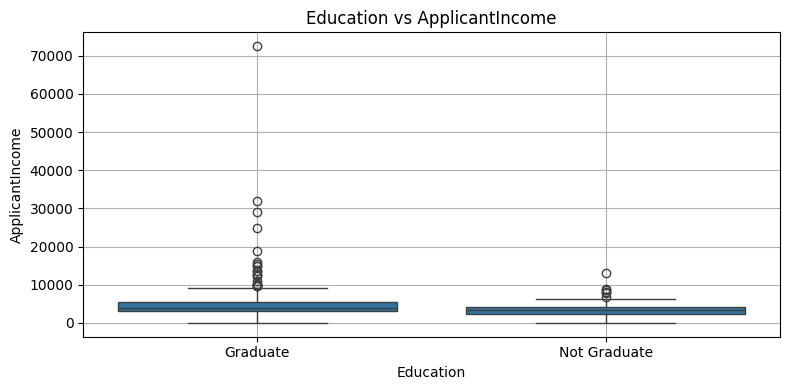

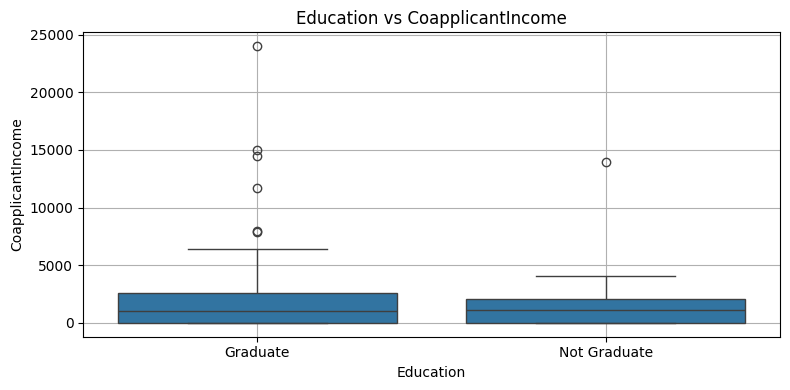

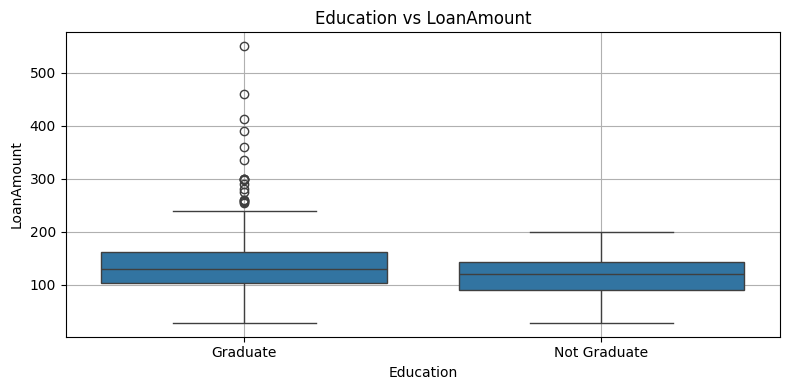

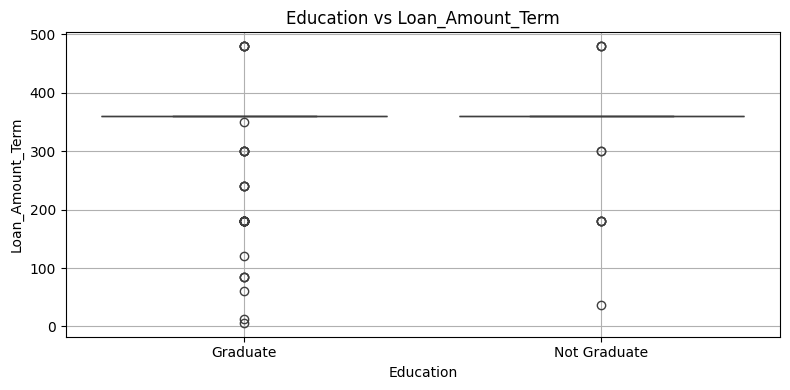

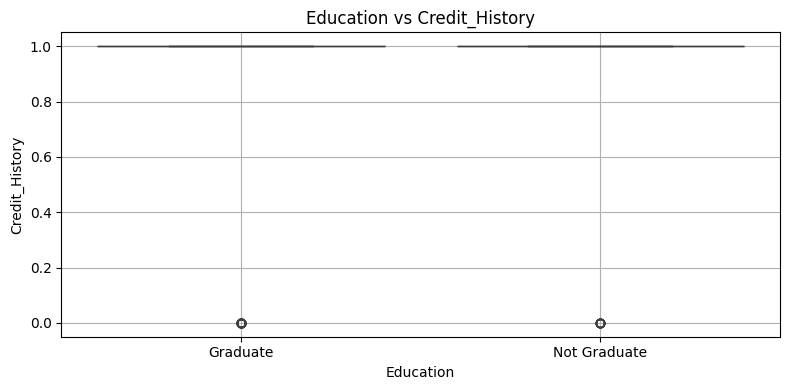

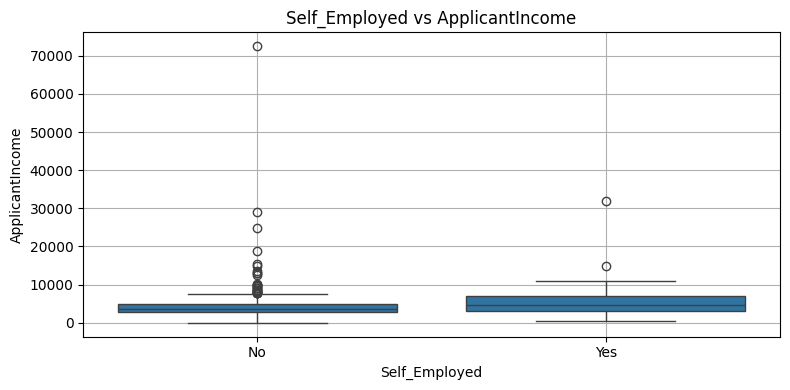

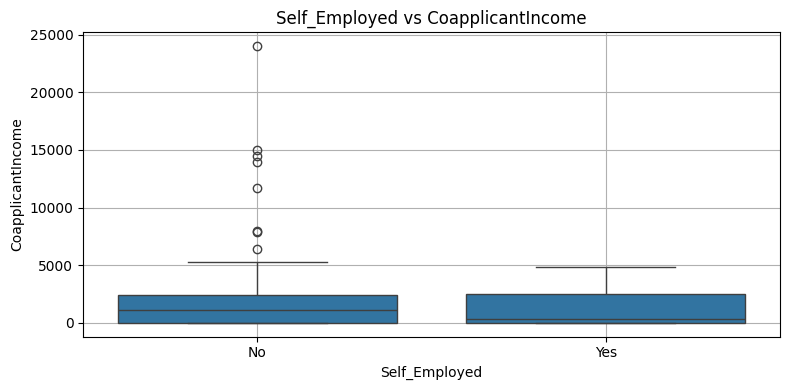

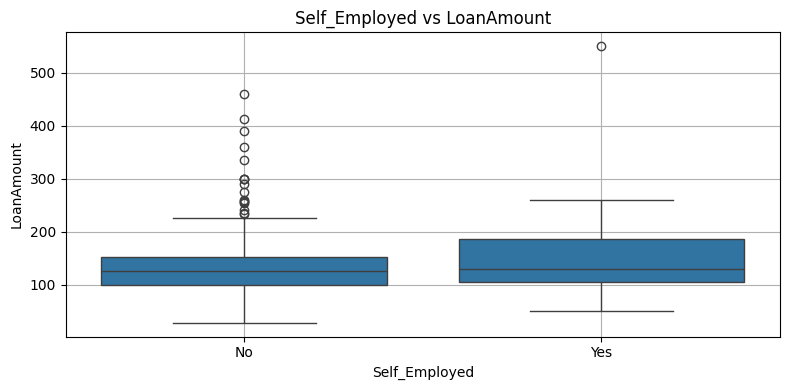

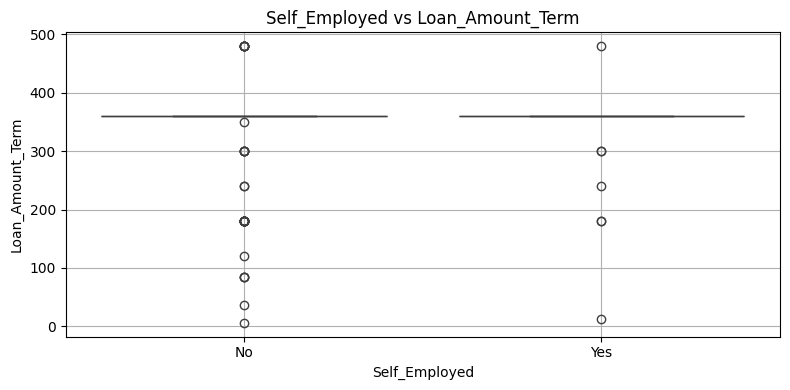

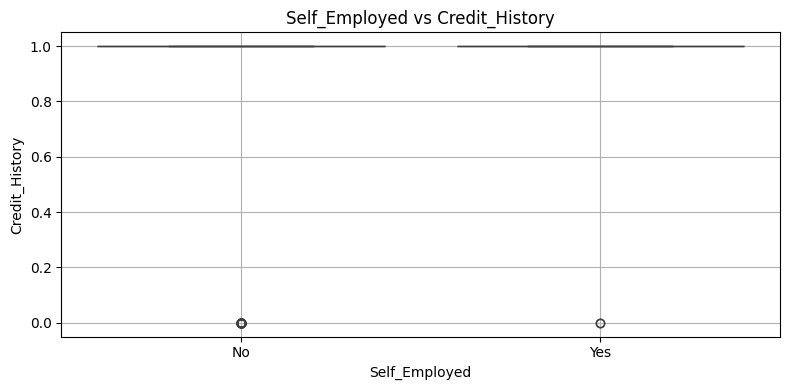

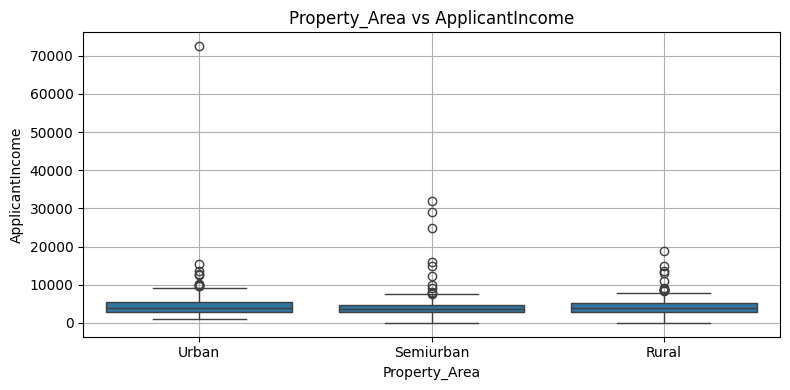

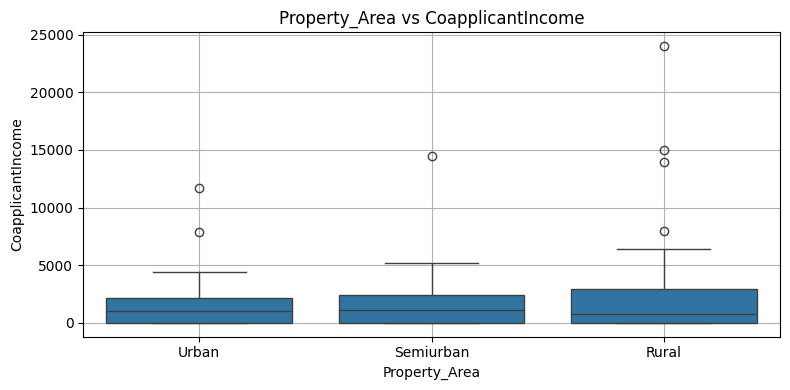

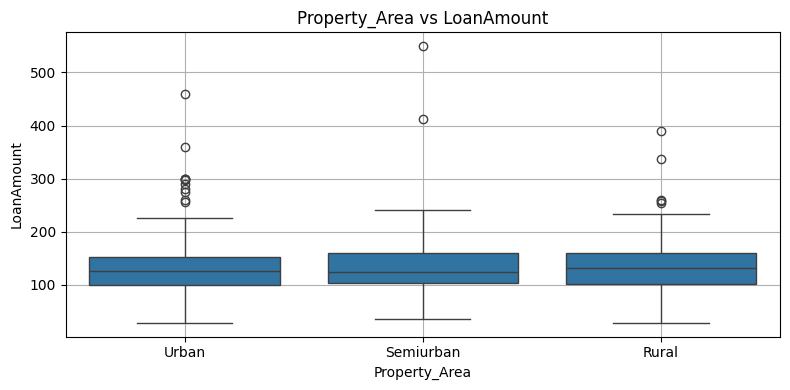

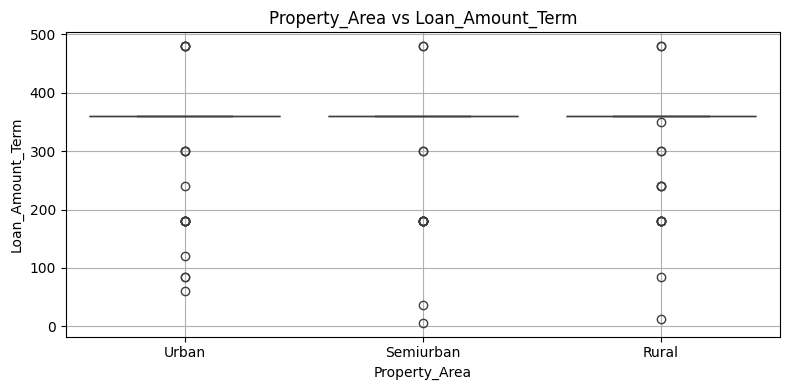

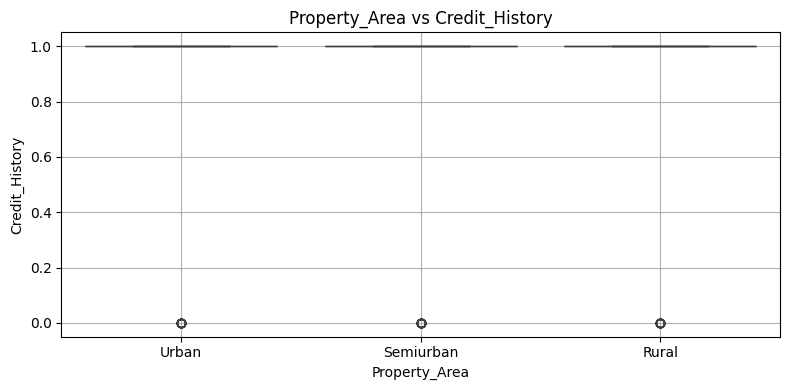

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in categorical_variable:
    for col2 in numeric_column:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df, x=col, y=col2)
        plt.title(f'{col} vs {col2}')
        plt.xlabel(col)
        plt.ylabel(col2)
        plt.grid(True)
        plt.tight_layout()
        plt.show()


2.3 Multivariate Analysis

In [ ]:
#  Perform a correlation analysis to identify relationships between numeric variables.
correlation_matrix = df[numeric_column].corr()
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.110335,0.493451,0.023249,0.099553
CoapplicantIncome,-0.110335,1.000000,0.150850,-0.010984,-0.071235
LoanAmount,0.493451,0.150850,1.000000,0.094950,-0.012578
Loan_Amount_Term,0.023249,-0.010984,0.094950,1.000000,-0.053593
Credit_History,0.099553,-0.071235,-0.012578,-0.053593,1.000000


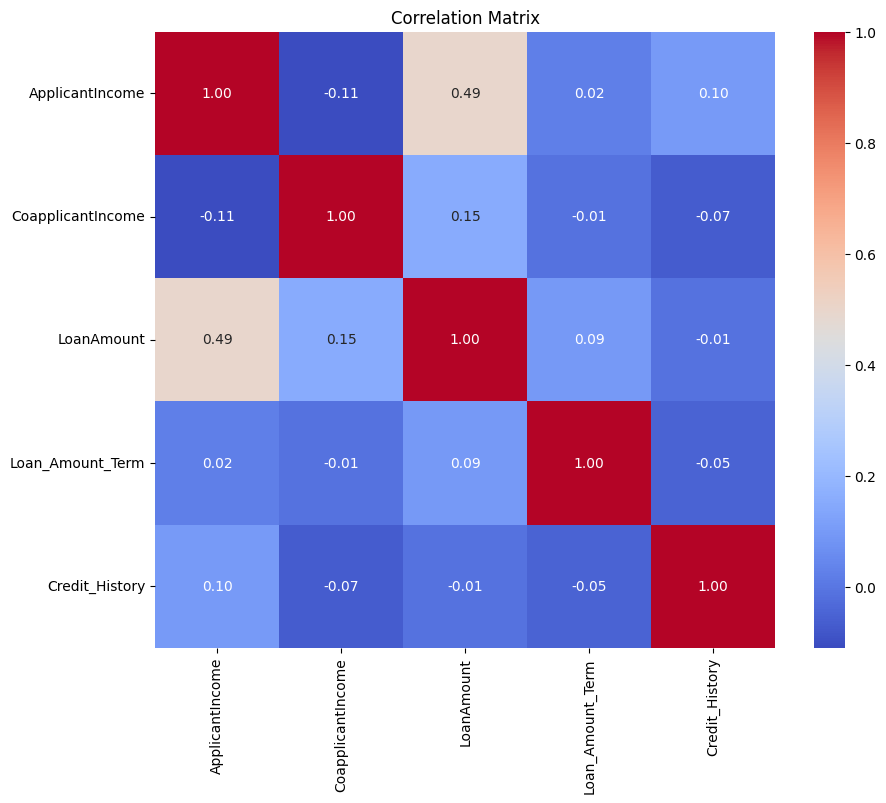

In [ ]:
#  Visualize correlations using a heatmap.
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

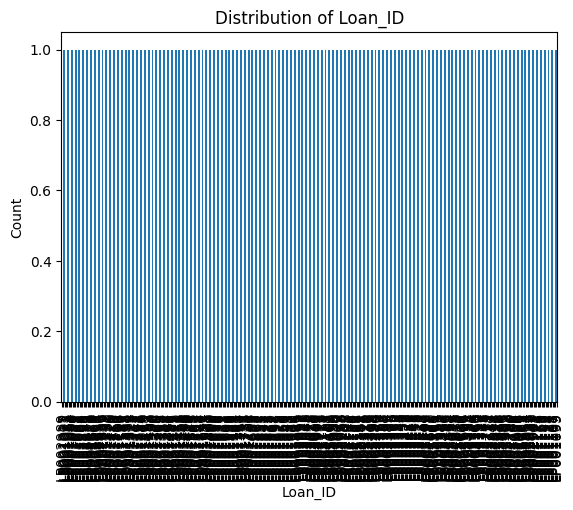

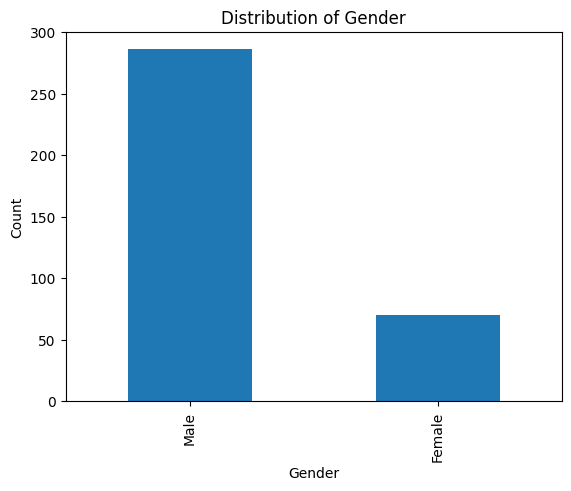

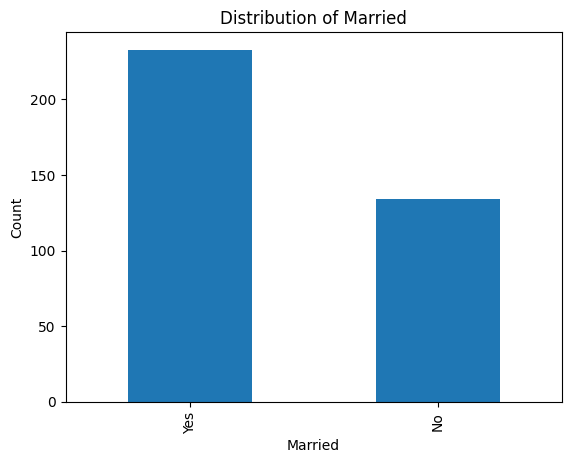

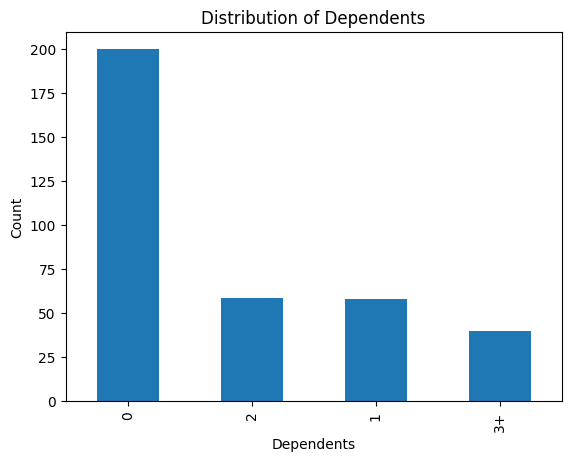

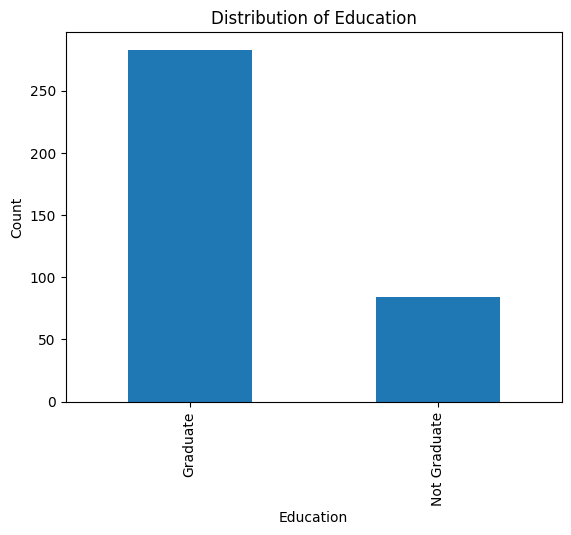

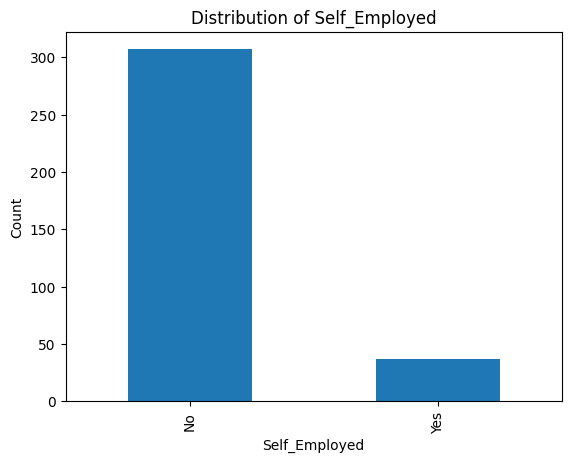

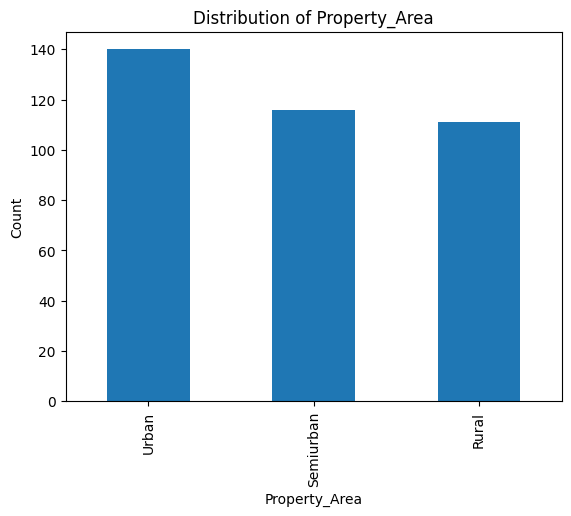

In [ ]:
#  Create a stacked bar chart to show the distribution of categorical variables across multiple categories.
for col in categorical_variable:
  df[col].value_counts().plot(kind='bar', stacked=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show()